In [1]:
from classy import *

Version:  0.0.14


## Load the Images and Reshape into vectors-targets

In [2]:
images=image.load_images('data/digits')

[0]: 178 files found
[1]: 182 files found
[2]: 177 files found
[3]: 183 files found
[4]: 181 files found
[5]: 182 files found
[6]: 181 files found
[7]: 179 files found
[8]: 174 files found
[9]: 180 files found


In [3]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [  0.00000000e+00   4.71341124e+00   8.25158598e+01   1.88401224e+02
   1.88589872e+02   9.17840846e+01   2.15581525e+01   2.04785754e+00
   8.51419032e-02   3.14913745e+01   1.65203116e+02   1.90677240e+02
   1.63504174e+02   1.30023372e+02   2.92036728e+01   1.70005565e+00
   4.22927101e-02   4.11185309e+01   1.57575960e+02   1.11080690e+02
   1.12814691e+02   1.24173066e+02   2.82609905e+01   7.82971619e-01
   1.66944908e-02   3.90011130e+01   1.44642181e+02   1.40286589e+02
   1.58007791e+02   1.20022816e+02   3.66889260e+01   3.33889816e-02
   0.00000000e+00   3.70083472e+01   1.21928770e+02   1.44347245e+02
   1.63978854e+02   1.39081803e+02   4.60222593e+01   0.00000000e+00
   1.37451308e-01   2.49860879e+01   1.09460768e+02   1.14961046e+02
   1.21993879e+02   1

In [4]:
data.vectors.shape

(1797, 64)

In [5]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


## View one of the vectors, and possibly save it to a file

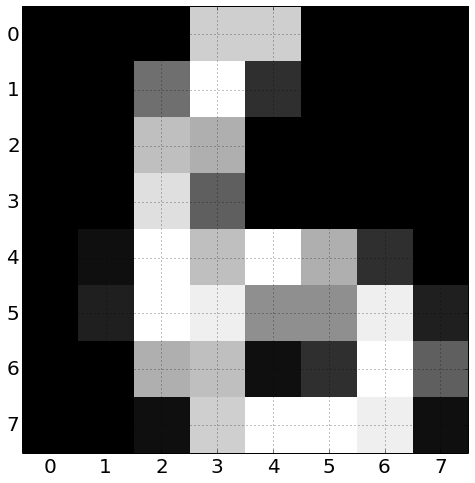

In [9]:
image.vector_to_image(data_train.vectors[800,:],(8,8))

only do this if you want to save the actual image

In [10]:
image.vector_to_image(data_train.vectors[800,:],(8,8),'test.png')

## Classification

In [7]:
C=NaiveBayes()

In [8]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.00680899620056 seconds 


In [9]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 79.7327394209
On Test Set: 79.7777777778


In [10]:
C=RCE()

In [11]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  2.15483903885 seconds 


In [12]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 100.0
On Test Set: 98.4444444444


## Footnote

### Loading Files with Patterns

Here is a little note about how to load data from folders, using the filenames and not the folder structure.  

In [1]:
from classy import *

here the pattern translates to (note the asterisks "*" in the pattern)

* "data/digits/(all folders)/(any .png file starting with 133)"
* "data/digits/(all folders)/(any .png file starting with 123)"

In [3]:
data=image.load_images_from_filepatterns(this='data/digits/*/133*.png',
                                         that='data/digits/*/123*.png',
                                         )

[this]: 11 files found
	data/digits/0/1335.png
	data/digits/0/1336.png
	data/digits/1/1334.png
	data/digits/2/1337.png
	data/digits/2/1338.png
	data/digits/3/133.png
	data/digits/3/1332.png
	data/digits/5/1333.png
	data/digits/7/1330.png
	data/digits/7/1331.png
	data/digits/7/1339.png
[that]: 11 files found
	data/digits/0/1235.png
	data/digits/0/1236.png
	data/digits/1/1237.png
	data/digits/2/1232.png
	data/digits/2/1234.png
	data/digits/5/1231.png
	data/digits/6/1239.png
	data/digits/7/1238.png
	data/digits/8/123.png
	data/digits/8/1233.png
	data/digits/9/1230.png


In [4]:
summary(data)

Images
22 images of shape (8, 8)
Target values given.
Target names: 'this', 'that'
